# Time Series Forescasting

In [2]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_csv('SVR_prediction.csv',index_col=0, parse_dates=[0])

In [4]:
sales.tail()

,Close_Price
Date,
2019-12-30,4408.702197
2019-12-31,4412.708262
2020-01-01,4410.553188
2020-01-02,4403.882699
2020-01-03,4388.986024


In [119]:
sales.plot()

Stationary means mean, variance and covariance is constant over periods.

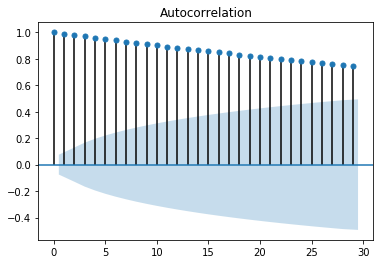

In [120]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

### Converting series to stationary

In [121]:
sales.head()

,Close_Price
Date,
2017-01-02,3090.624108
2017-01-03,3057.228836
2017-01-04,3025.788498
2017-01-05,3037.632078
2017-01-06,3038.944501


In [122]:
sales.shift(1)

,Close_Price
Date,
2017-01-02,NaN
2017-01-03,3090.624108
2017-01-04,3057.228836
2017-01-05,3025.788498
2017-01-06,3037.632078
...,...
2019-12-30,4411.382647
2019-12-31,4408.702197
2020-01-01,4412.708262


In [123]:
sales_diff = sales.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


In [124]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Close_Price
Date,
2017-01-03,-33.395272
2017-01-04,-31.440338
2017-01-05,11.843579
2017-01-06,1.312423
2017-01-09,-42.274864


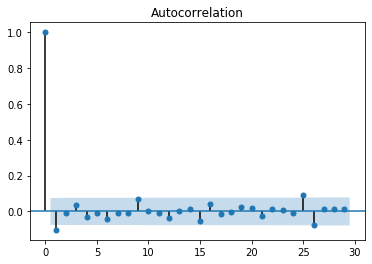

In [125]:
plot_acf(sales_diff)

In [126]:
sales_diff.plot()

In [127]:
X = sales.values
train = X[0:660] # 27 data as train data
test = X[660:]  # 9 data as test data
predictions = []

In [128]:
train.size

660

# Autoreggresive AR Model

In [129]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [130]:
predictions = model_ar_fit.predict(start=660,end=675)

In [131]:
test

array([[4140.22192513],
       [4132.13389737],
       [4156.41719038],
       [4204.754951  ],
       [4210.06377219],
       [4223.24595796],
       [4307.01684154],
       [4236.27375605],
       [4278.95446144],
       [4338.8156599 ],
       [4336.82708796],
       [4379.79024302],
       [4375.44097221],
       [4409.89931632],
       [4412.47516657],
       [4410.92732012],
       [4411.38264734],
       [4408.7021975 ],
       [4412.70826163],
       [4410.55318783],
       [4403.88269894],
       [4388.98602446]])

In [132]:
predictions

array([4132.10570244, 4138.16068267, 4136.52434713, 4134.83305032,
       4124.65929475, 4126.10811512, 4128.04303988, 4133.22930803,
       4131.6023332 , 4129.91081095, 4126.65164798, 4124.26061753,
       4126.26977672, 4121.19313729, 4124.0733628 , 4123.23177016])

In [133]:
plt.plot(test)
plt.plot(predictions,color='red')

In [134]:
sales.plot()

# ARIMA model

In [135]:
from statsmodels.tsa.arima_model import ARIMA

In [136]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq
l=[]

In [137]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,l.append(model_arima_fit.aic))
    except:
        continue    

(0, 0, 0) None
(0, 0, 1) None
(0, 0, 2) None
(0, 0, 3) None
(0, 0, 4) None
(0, 1, 0) None
(0, 1, 1) None
(0, 1, 2) None
(0, 1, 3) None
(0, 1, 4) None
(0, 2, 0) None
(0, 2, 1) None
(1, 0, 0) None
(1, 0, 1) None
(1, 0, 2) None
(1, 0, 3) None
(1, 0, 4) None
(1, 1, 0) None
(1, 1, 1) None
(1, 2, 0) None
(1, 2, 1) None
(1, 2, 2) None
(1, 2, 3) None
(1, 2, 4) None
(2, 0, 0) None
(2, 0, 1) None
(2, 1, 0) None
(2, 1, 1) None
(2, 1, 2) None
(2, 2, 0) None
(2, 2, 1) None
(2, 2, 2) None
(2, 2, 3) None
(2, 2, 4) None
(3, 0, 0) None
(3, 0, 1) None
(3, 0, 2) None
(3, 1, 0) None
(3, 1, 1) None
(3, 1, 2) None
(3, 1, 3) None
(3, 2, 0) None
(3, 2, 1) None
(3, 2, 2) None
(3, 2, 3) None
(3, 2, 4) None
(4, 0, 0) None
(4, 0, 1) None
(4, 0, 2) None
(4, 0, 3) None
(4, 1, 0) None
(4, 1, 1) None
(4, 1, 2) None
(4, 1, 3) None
(4, 1, 4) None
(4, 2, 0) None
(4, 2, 1) None
(4, 2, 2) None
(4, 2, 3) None
(4, 2, 4) None


In [138]:
l

[9700.637281600126,
 8898.147107271043,
 8361.344228217955,
 8009.029772808461,
 7765.140036470759,
 6890.9418417299885,
 6885.984368696991,
 6887.954956378278,
 6889.560018931319,
 6890.679537678265,
 7400.649590692192,
 6889.404644637808,
 6907.188640425311,
 6902.881731456851,
 6904.876907877659,
 6906.3191981053915,
 6907.65104146142,
 6886.179232237273,
 6887.964203537173,
 7174.635127794668,
 6884.7213821170335,
 6886.522983107061,
 6887.203944089107,
 6889.061359525527,
 6903.010288078691,
 6904.878675713753,
 6887.861811424758,
 6888.545191932122,
 6890.521110317695,
 7072.732746144066,
 6886.42401330852,
 6887.101618053388,
 6889.07217393898,
 6891.060085752104,
 6904.799321275177,
 6905.452803710359,
 6907.391440609605,
 6889.367309167388,
 6890.589912746766,
 6892.173667254821,
 6894.506278942581,
 7036.608253587923,
 6887.902379558274,
 6889.146838874198,
 6888.8092565545,
 6892.89504337203,
 6906.150952314454,
 6907.3813116772235,
 6912.516699477737,
 6912.639405670008,
 6

In [139]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(1,2,1))
model_arima_fit = model_arima.fit(disp=0)
print(model_arima_fit.aic)

6884.7213821170335


In [140]:
#prediction= model_arima.predict(test)
predictions= model_arima_fit.forecast(steps=100)[0]
predictions
#prediction

array([4142.35403157, 4146.1627048 , 4150.08168903, 4153.99725012,
       4157.92082619, 4161.85126691, 4165.78868797, 4169.73307775,
       4173.6844374 , 4177.64276682, 4181.60806601, 4185.58033498,
       4189.55957371, 4193.54578222, 4197.5389605 , 4201.53910855,
       4205.54622638, 4209.56031398, 4213.58137135, 4217.6093985 ,
       4221.64439541, 4225.6863621 , 4229.73529856, 4233.7912048 ,
       4237.85408081, 4241.92392659, 4246.00074214, 4250.08452746,
       4254.17528256, 4258.27300743, 4262.37770208, 4266.48936649,
       4270.60800068, 4274.73360464, 4278.86617838, 4283.00572188,
       4287.15223516, 4291.30571821, 4295.46617104, 4299.63359363,
       4303.807986  , 4307.98934815, 4312.17768006, 4316.37298175,
       4320.57525321, 4324.78449444, 4329.00070545, 4333.22388623,
       4337.45403678, 4341.6911571 , 4345.9352472 , 4350.18630706,
       4354.44433671, 4358.70933612, 4362.98130531, 4367.26024427,
       4371.546153  , 4375.8390315 , 4380.13887978, 4384.44569

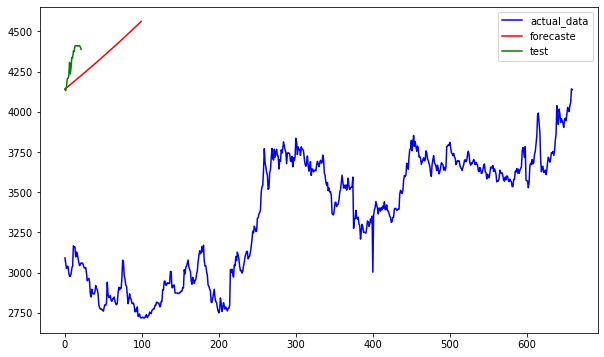

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(train,label='actual_data',color='blue')
plt.plot(predictions,label='forecaste',color='red')
plt.plot(test,label='test',color='green')
#plt.title(" polt data between actual price and predict price by SVR")
plt.legend()
plt.show()

# exponential smoothing

In [159]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing
import numpy as np

In [160]:
data= pd.read_csv('SVR_prediction.csv')

In [161]:
data.head()

,Date,Close_Price
0,2-Jan-17,3090.624108
1,3-Jan-17,3057.228836
2,4-Jan-17,3025.788498
3,5-Jan-17,3037.632078
4,6-Jan-17,3038.944501


In [162]:
dates = pd.date_range(start='2017-01-02', freq='MS', periods=len(data))
dates[0:5]

DatetimeIndex(['2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01'],
              dtype='datetime64[ns]', freq='MS')

In [163]:
data.set_index(dates,inplace=True)
data.drop('Date',axis=1,inplace=True)

In [164]:
train_len = int(np.ceil(len(data) * 0.75))
train=data[0:train_len] 
test=data[train_len:]

In [166]:

fit1 = ExponentialSmoothing(np.asarray(train['Close_Price']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit1.params

{'damping_slope': nan,
 'initial_level': 3271.246200563238,
 'initial_seasons': array([-218.94851382, -219.11470283, -222.14560014, -216.37513425,
        -220.75972319, -214.94993562, -216.63076148, -214.70717932,
        -217.6932237 , -214.26260452, -217.70587375, -214.83708348]),
 'initial_slope': 0.9711757834562381,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.8511254983508509,
 'smoothing_seasonal': 9.818737070080356e-61,
 'smoothing_slope': 1.812878661249647e-82,
 'use_boxcox': False}

In [169]:
Forecasting = fit1.forecast(steps=17)

In [170]:
Forecasting

array([3692.24933868, 3696.65113364, 3694.1790402 , 3698.01900625,
       3694.87875169, 3695.68373847, 3693.62401694, 3700.36565861,
       3696.95224546, 3703.73320881, 3703.02355874, 3705.91831667,
       3703.90344808, 3708.30524304, 3705.8331496 , 3709.67311565,
       3706.53286109])